<a href="https://colab.research.google.com/github/CeSaRLoPeZArTeAgA/SQL-SERVER/blob/main/SESI%C3%93N_8_Vistas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

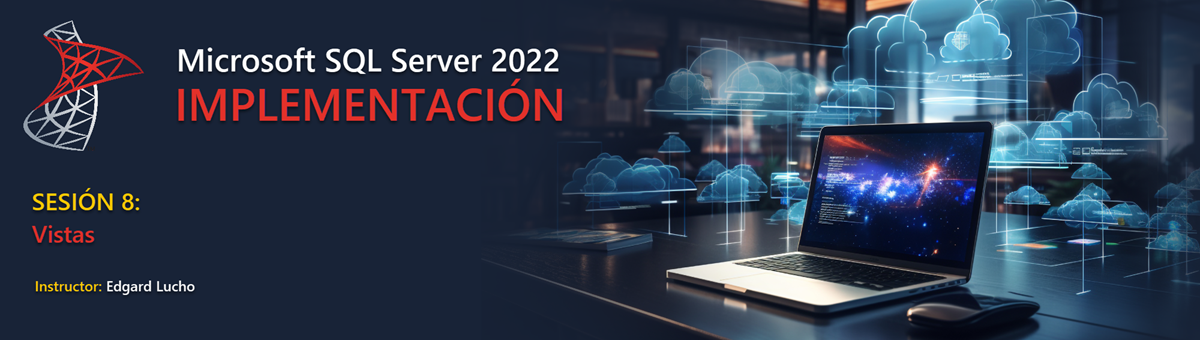

<table border=1 width='99%'>
<tr>
<td bgcolor='#00468C'>

# **<font color="#FFFFFF">SESIÓN 8: Vistas</font>**

</td>
</tr>
</table>

Las vistas son objetos de base de datos que se definen como consultas almacenadas en la base de datos.

Una vista es una representación lógica de una o más tablas en la base de datos.

Proporciona una forma conveniente de consultar y manipular datos al ocultar la complejidad de las consultas subyacentes.

<table width='99%'>
<tr>
<td bgcolor='#FFC901'>

## **<font color="#000000"> 🗹 Ventajas de las vistas</font>**

</td>
</tr>
</table>

>* **Simplificación de consultas**: Las vistas pueden combinar datos de múltiples tablas y presentarlos como una única entidad lógica. Esto permite a los usuarios escribir consultas más simples y concisas en lugar de tener que lidiar con consultas complejas que involucran múltiples JOIN y condiciones.
>* **Ocultación de detalles de implementación**: Las vistas proporcionan una capa de abstracción entre los usuarios y la estructura física de la base de datos. Esto significa que los usuarios pueden acceder y manipular datos sin necesidad de conocer los detalles de cómo se almacenan los datos o cómo se realizan las consultas subyacentes. Se pueden realizar cambios en la estructura o la lógica de la base de datos sin afectar la forma en que los usuarios interactúan con las vistas.
>* **Mejora de la seguridad**: Las vistas pueden utilizarse para controlar el acceso a los datos al ocultar ciertas columnas o filas de la tabla subyacente. Esto permite restringir el acceso a datos confidenciales o sensibles y garantizar que solo se muestren los datos relevantes para cada usuario. Además, se pueden aplicar permisos de acceso a nivel de vista, lo que proporciona un mayor control sobre quién tiene acceso a qué datos.
>* **Simplificación del código de aplicación**: El uso de vistas puede simplificar el código de la aplicación al proporcionar una interfaz consistente y reutilizable para acceder a los datos. En lugar de tener consultas complejas dispersas en el código de la aplicación, se puede utilizar una vista para encapsular la lógica de consulta común y reutilizarla en diferentes partes de la aplicación.
>* **Mejora del rendimiento**: En algunos casos, el uso de vistas puede mejorar el rendimiento de las consultas al permitir la creación de índices específicos para las vistas. Esto puede acelerar el acceso a los datos y agilizar las consultas que se basan en las vistas.

<table width='99%'>
<tr>
<td bgcolor='#FFC901'>

## **<font color="#000000"> 🗹 Desventajas de las vistas</font>**

</td>
</tr>
</table>

>* **Sobrecarga de rendimiento**: En algunos casos, el uso de vistas puede introducir una sobrecarga adicional de rendimiento. Esto se debe a que las vistas implican consultas adicionales y procesamiento para obtener los resultados deseados. Si la vista involucra consultas complejas o incluye una gran cantidad de datos, puede haber un impacto negativo en el rendimiento de las consultas.
>* **Problemas de mantenimiento**: Las vistas están sujetas a cambios en la estructura de la base de datos subyacente. Si se realizan cambios en las tablas o columnas utilizadas en una vista, es posible que la vista deba modificarse o actualizar para reflejar los cambios. Esto puede requerir un esfuerzo adicional de mantenimiento y asegurarse de que todas las vistas estén actualizadas y funcionando correctamente.
>* **Complejidad adicional**: Si bien las vistas pueden simplificar las consultas para los usuarios finales, también pueden agregar complejidad adicional al diseño y desarrollo de la base de datos. La creación y gestión de vistas puede requerir un conocimiento más profundo de SQL y una comprensión de cómo las vistas se relacionan con las tablas subyacentes.
>* **Dependencia de permisos**: Las vistas pueden heredar permisos de las tablas subyacentes, lo que puede causar problemas de seguridad si no se gestionan adecuadamente. Si un usuario tiene acceso a una vista, también puede tener acceso a los datos de las tablas subyacentes, lo que podría comprometer la seguridad en algunos casos.
>* **Limitaciones de actualización**: En general, las vistas son utilizadas para consultas de solo lectura, lo que significa que no se pueden utilizar para realizar actualizaciones directamente en los datos subyacentes. Si se requiere la capacidad de realizar operaciones de actualización en los datos, se deben considerar otras opciones, como procedimientos almacenados o instrucciones SQL directas.

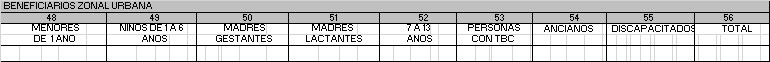



```
USE pvl
GO
SELECT
	DATEDIFF(DAY,fec_nac_ben_da,'31/07/2004')/365.256363004 AS Días,
	CONVERT(INT,DATEDIFF(DAY,fec_nac_ben_da,'31/07/2004')/365.256363004) AS Edad
FROM Beneficiario
GO
```





```
USE pvl
GO
DECLARE @N0 AS INT
DECLARE @N1_6 AS INT
DECLARE @N7_13 AS INT
DECLARE @MG AS INT
DECLARE @ML AS INT
DECLARE @A AS INT
SET @N0 =
(
	SELECT
		COUNT(*)
	FROM Beneficiario
	WHERE CONVERT(INT,DATEDIFF(DAY,fec_nac_ben_da,'31/07/2004')/365.256363004)=0
)
SET @N1_6 =
(
	SELECT
		COUNT(*)
	FROM Beneficiario
	WHERE CONVERT(INT,DATEDIFF(DAY,fec_nac_ben_da,'31/07/2004')/365.256363004) BETWEEN 1 AND 6
)
SET @N7_13 =
(
	SELECT
		COUNT(*)
	FROM Beneficiario
	WHERE CONVERT(INT,DATEDIFF(DAY,fec_nac_ben_da,'31/07/2004')/365.256363004) BETWEEN 7 AND 13
)

SET @MG =
(
	SELECT
		COUNT(*)
	FROM Beneficiario
	WHERE CONVERT(INT,DATEDIFF(DAY,fec_emb_ben_da,'31/07/2004')/7) BETWEEN 0 AND 42
)
SET @ML =
(
	SELECT
		COUNT(*)
	FROM Beneficiario
	WHERE CONVERT(INT,DATEDIFF(DAY,fec_lac_ben_da,'31/07/2004')/365.256363004)=0
)

SET @A =
(
	SELECT
		COUNT(*)
	FROM Beneficiario
	WHERE
		(
			CONVERT(INT,DATEDIFF(DAY,fec_nac_ben_da,'31/07/2004')/365.256363004)>=60
			AND
			cod_sex_bi = 0
		)
		OR
		(
			CONVERT(INT,DATEDIFF(DAY,fec_nac_ben_da,'31/07/2004')/365.256363004)>=65
			AND
			cod_sex_bi = 1
		)
)

SELECT
	@N0 AS 'MENORES DE UN AÑO',
	@N1_6 AS 'NIÑOS DE 1 A 6 AÑOS',
	@MG AS 'MADRES GESTANTES',
	@ML AS 'MADRES LACTANTES',
	@N7_13 AS 'NIÑOS DE 7 A 13 AÑOS',
	@A AS 'ANCIANOS',
	@N0+
	@N1_6+
	@MG +
	@ML +
	@N7_13 +
	@A AS 'TOTAL'


GO
```



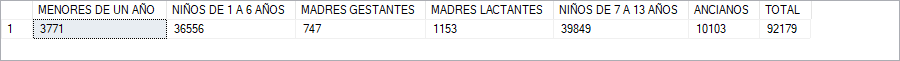



```
USE Northwind
GO
IF EXISTS
(
	SELECT name
	FROM sys.views
	WHERE name = 'v_categoria_consulta'
)
DROP VIEW v_categoria_consulta
GO
CREATE VIEW v_categoria_consulta
WITH ENCRYPTION
AS
SELECT
	CategoryID AS Código,
	CategoryName AS Categoría
FROM Categories
GO
SELECT * FROM v_categoria_consulta
GO
```





```
USE Northwind
GO
sp_depends 'v_categoria_consulta'
GO
SET SHOWPLAN_ALL ON
GO
SELECT * FROM v_categoria_consulta
GO
SET SHOWPLAN_ALL OFF
GO
```



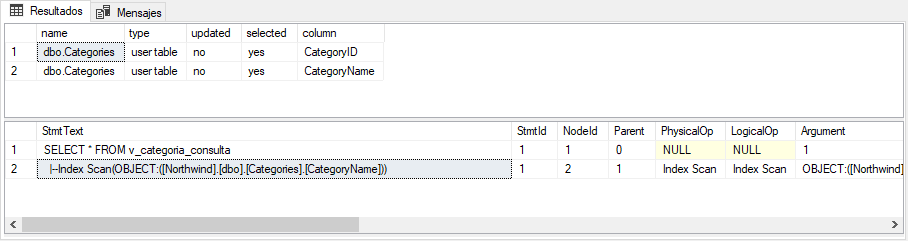

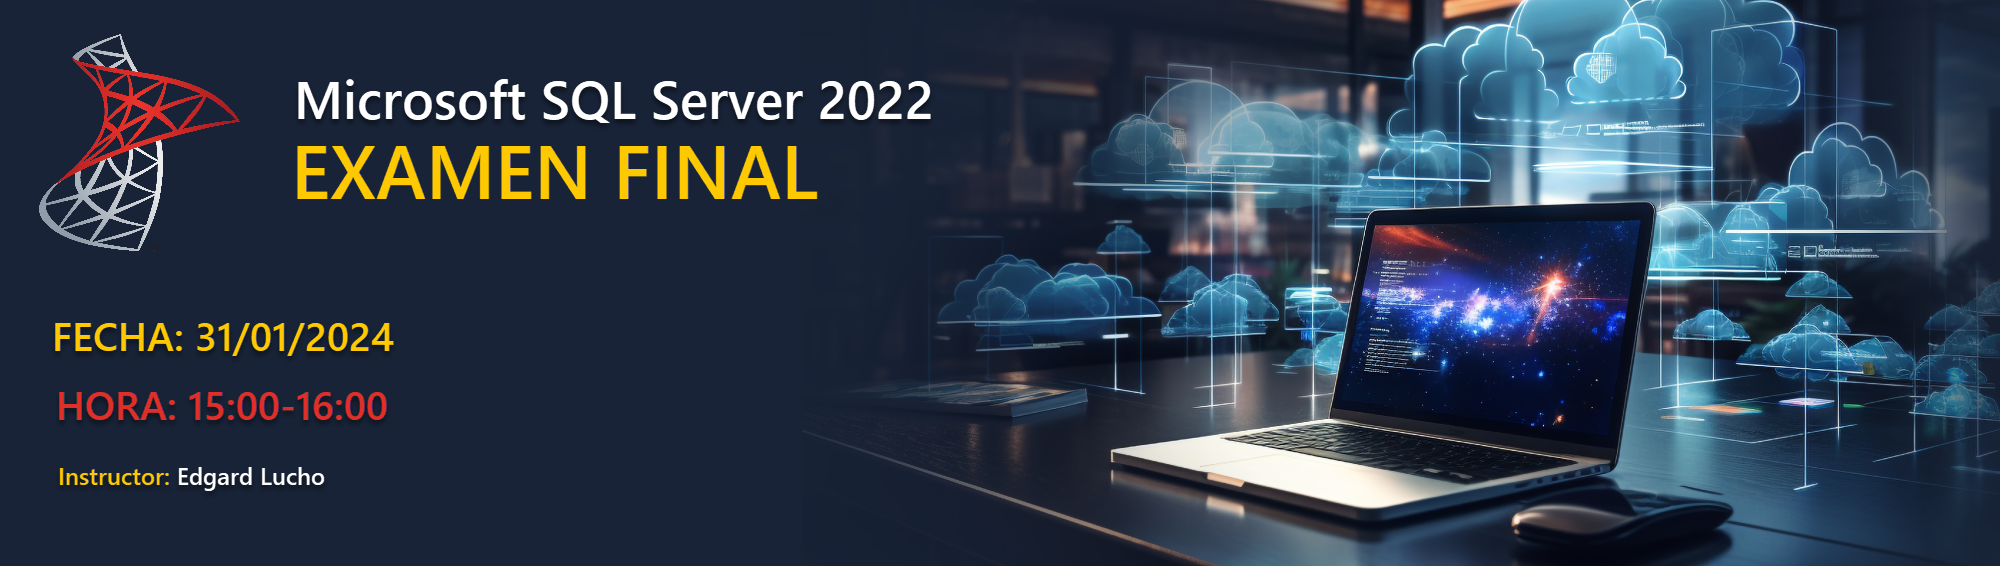

<table width='99%'>
<tr>
<td bgcolor='#005DA7'>

# **<font color="#FFFFFF">EXAMEN FINAL</font>**

</td>
</tr>
</table>

<table width='99%'>
<tr>
<td bgcolor='#FFC901'>

## **<font color="#000000"> 🗹 HORA DE INICIO DEL EXAMEN: 15:02</font>**

</td>
</tr>
</table>

<table width='99%'>
<tr>
<td bgcolor='#FFC901'>

## **<font color="#000000"> 🗹 HORA DE FINALIZACIÓN DEL EXAMEN: 16:05</font>**

</td>
</tr>
</table>

[Enlace para el Examen Final](https://forms.gle/Chp12obzU6YzCDA17)